In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, RobustScaler

%matplotlib inline

In [2]:
data = pd.read_csv('./Downloads/train.csv')
X_test = pd.read_csv('./Downloads/test.csv')

In [3]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif

                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [4]:
def create_my_boxplot(ser, cat):
    sns.boxplot(data=ser, orient='h')
    plt.ylabel(cat)
    plt.show()

In [5]:
data = reduce_mem_usage(data)
X_test = reduce_mem_usage(X_test)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%
Memory usage of dataframe is 0.72 MB
Memory usage after optimization is: 0.21 MB
Decreased by 70.3%


In [6]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981560,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.937500
1,15053,41,3.0,65.683640,40.049541,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.437500
2,4765,53,2.0,44.947952,29.197611,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.906250
3,5809,58,2.0,53.352982,52.731510,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.234375
4,10783,99,1.0,39.649193,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531250


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

Заполнение NaN

In [8]:
data.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [9]:
data.loc[data['LifeSquare'].isna(), 'LifeSquare'] = data['LifeSquare'].median()
X_test.loc[X_test['LifeSquare'].isna(), 'LifeSquare'] = X_test['LifeSquare'].median()


In [10]:
data.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [11]:
healthcare_1_mod = data['Healthcare_1'].mode()[0]
healthcare_1_mod_test = X_test['Healthcare_1'].mode()[0]
data['Healthcare_1'].fillna(healthcare_1_mod, inplace=True)
X_test['Healthcare_1'].fillna(healthcare_1_mod_test, inplace=True)

In [12]:
data.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

Исправление выбросов

In [13]:
data.HouseYear.value_counts()

1977        2652
2017         308
2016         305
2015         299
2014         210
            ... 
1947           1
1916           1
1910           1
1928           1
20052011       1
Name: HouseYear, Length: 97, dtype: int64

In [14]:
data[data.HouseYear > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265072,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.531250
4189,11607,147,2.0,44.791836,28.360394,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.609375


In [15]:
data.loc[data.HouseYear > 2020, 'HouseYear'] = data['HouseYear'].median()
X_test.loc[X_test.HouseYear > 2020, 'HouseYear'] = X_test['HouseYear'].median()


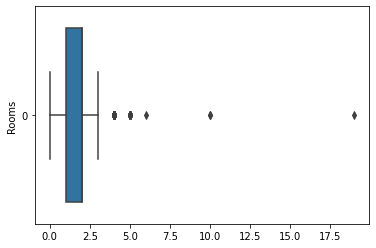

In [16]:
create_my_boxplot(data.Rooms, 'Rooms')


In [17]:
data.loc[(data.Rooms > 5)].Rooms.value_counts()

10.0    2
6.0     1
19.0    1
Name: Rooms, dtype: int64

In [18]:
data.loc[(data.Rooms > 5), 'Rooms'] = data['Rooms'].median()
data.loc[(data.Rooms == 0), 'Rooms'] = 1
X_test.loc[(X_test.Rooms >= 10), 'Rooms'] = X_test['Rooms'].median()
X_test.loc[(X_test.Rooms == 0), 'Rooms'] = 1


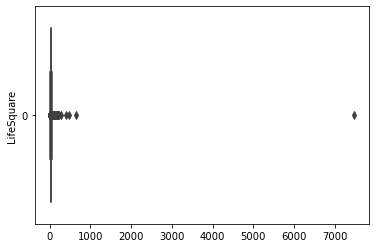

In [19]:
create_my_boxplot(data.LifeSquare, 'LifeSquare')


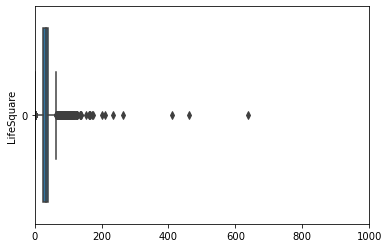

In [20]:
sns.boxplot(data=data.LifeSquare, orient='h')
plt.ylabel('LifeSquare')
plt.xlim(0, 1000)
plt.show()

In [21]:
data.loc[data.Square < data.LifeSquare, 'LifeSquare'] = data['LifeSquare'].median()
X_test.loc[X_test.Square < X_test.LifeSquare, 'LifeSquare'] = X_test['LifeSquare'].median()

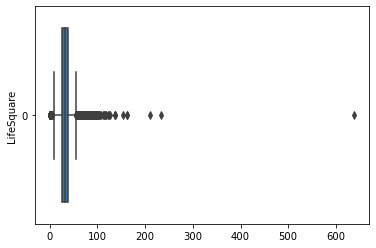

In [22]:
create_my_boxplot(data.LifeSquare, 'LifeSquare')

In [23]:
data.loc[data.LifeSquare > 200].LifeSquare.value_counts()

638.163208    1
211.231125    1
233.949310    1
Name: LifeSquare, dtype: int64

In [24]:
data.loc[data.LifeSquare > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,1.0,212.932358,211.231125,0.0,2,3.0,2008.0,0.211401,B,B,9,1892,0,540.0,0,1,B,302211.2500
1982,5548,86,5.0,275.645294,233.949310,26.0,12,37.0,2011.0,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.8750
6977,11602,30,2.0,641.065186,638.163208,10.0,20,19.0,2019.0,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.6875


In [25]:
data.loc[data.LifeSquare > 200, 'LifeSquare'] = data['LifeSquare'].median()
X_test.loc[X_test.LifeSquare > 200, 'LifeSquare'] = X_test['LifeSquare'].median()

In [26]:
data.loc[data.LifeSquare > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


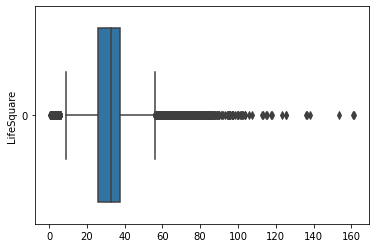

In [27]:
create_my_boxplot(data.LifeSquare, 'LifeSquare')

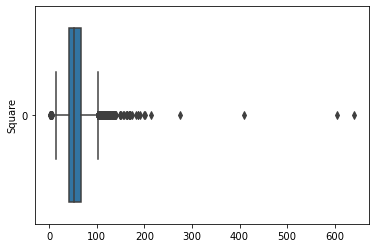

In [28]:
create_my_boxplot(data.Square, 'Square')


In [29]:
data.loc[(data.Square > 200) & (data.Rooms < 4)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,1.0,212.932358,32.781261,0.0,2,3.0,2008.0,0.211401,B,B,9,1892,0,540.0,0,1,B,302211.250000
4262,28,9,2.0,604.705994,32.781261,1.0,17,18.0,1977.0,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.250000
4690,2307,102,1.0,409.425171,32.781261,10.0,4,4.0,2016.0,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.429688
6977,11602,30,2.0,641.065186,32.781261,10.0,20,19.0,2019.0,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.687500


In [30]:
data.loc[(data.Square > 200) & (data.Rooms < 4), 'Square'] = data.loc[(data.Rooms < 4)]['Square'].median()
X_test.loc[(data.Square > 200) & (data.Rooms < 4), 'Square'] = X_test.loc[(X_test.Rooms < 4)]['Square'].median()


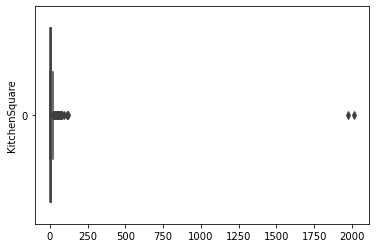

In [31]:
create_my_boxplot(data.KitchenSquare, 'KitchenSquare')


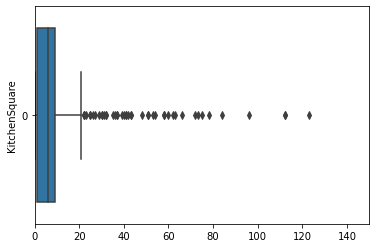

In [32]:
sns.boxplot(data=data.KitchenSquare, orient='h')
plt.ylabel('KitchenSquare')
plt.xlim(0, 150)
plt.show()

In [33]:
kit_q = data['KitchenSquare'].median() / data['Square'].median()
kit_q_test = X_test['KitchenSquare'].median() / X_test['Square'].median()
kit_q

0.11431073171880356

In [34]:
data.loc[data['KitchenSquare'] < 5, 'KitchenSquare']

2       0.0
7       0.0
8       1.0
12      1.0
14      1.0
       ... 
9985    1.0
9986    1.0
9987    0.0
9994    1.0
9997    1.0
Name: KitchenSquare, Length: 3222, dtype: float32

In [35]:
data.loc[data['KitchenSquare'] < 5, 'KitchenSquare'] = 5
X_test.loc[X_test['KitchenSquare'] < 5, 'KitchenSquare'] = 5

data.loc[data['KitchenSquare'] > 100, 'KitchenSquare'] = data['KitchenSquare'].median()
X_test.loc[X_test['KitchenSquare'] > 100, 'KitchenSquare'] = X_test['KitchenSquare'].median()

data.loc[((data.KitchenSquare >= data.Square) | (data.KitchenSquare >= data.LifeSquare)), 'KitchenSquare'] = data['KitchenSquare'].median()
X_test.loc[((X_test.KitchenSquare >= X_test.Square) | (X_test.KitchenSquare >= X_test.LifeSquare)), 'KitchenSquare'] = X_test['KitchenSquare'].median()


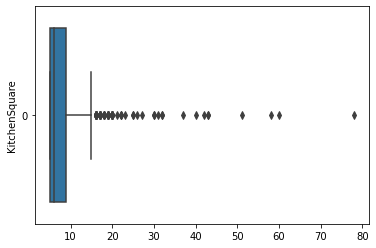

In [36]:
create_my_boxplot(data.KitchenSquare, 'KitchenSquare')

In [37]:
data.loc[(data['KitchenSquare']/ data['Square']) > 0.2]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
22,11852,48,1.0,41.668648,20.207762,10.0,19,22.0,1996.0,0.041125,B,B,46,9515,5,540.0,1,10,B,215083.968750
31,4785,61,1.0,41.765156,19.343185,9.0,12,16.0,1984.0,0.300323,B,B,52,10311,6,540.0,1,9,B,189007.234375
48,7596,23,1.0,47.080101,46.807991,12.0,3,9.0,1977.0,0.014073,B,B,2,475,0,540.0,0,0,B,96029.164062
53,6455,44,1.0,31.893484,20.946671,7.0,3,14.0,1973.0,0.175055,B,B,36,10055,3,540.0,1,0,B,182946.359375
58,1982,28,1.0,38.007935,23.281713,9.0,1,12.0,1970.0,0.118537,B,B,30,6207,1,1183.0,1,0,B,147636.765625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9958,12878,46,1.0,39.143940,22.650690,8.0,14,12.0,1981.0,0.000000,B,B,47,11319,0,1145.0,3,5,B,182459.515625
9967,3322,124,1.0,36.509792,20.174541,9.0,3,12.0,1969.0,0.122090,B,B,29,6566,7,1894.0,4,0,B,166649.250000
9982,12805,8,1.0,39.195152,22.158768,9.0,12,12.0,1968.0,0.437885,B,B,23,5735,3,1084.0,0,5,B,177449.718750
9996,6159,18,1.0,41.521545,20.539215,9.0,13,13.0,2000.0,0.000000,B,B,30,5562,0,540.0,0,5,A,189050.296875


In [38]:
data.loc[(data['KitchenSquare']/ data['Square']) > 0.2, 'KitchenSquare'] = data.loc[(data['KitchenSquare']/ data['Square']) > 0.2]['Square'] * kit_q
X_test.loc[(X_test['KitchenSquare']/ X_test['Square']) > 0.2, 'KitchenSquare'] = X_test.loc[(X_test['KitchenSquare']/ X_test['Square']) > 0.2]['Square'] * kit_q_test


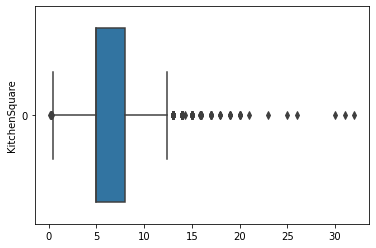

In [39]:
create_my_boxplot(data.KitchenSquare, 'KitchenSquare')

In [40]:
index_data_big_sq = data.loc[(data.LifeSquare + data.KitchenSquare) > data.Square].index
index_X_big_sq = X_test.loc[(X_test.LifeSquare + X_test.KitchenSquare) > X_test.Square].index

new_data = data.Square - data.KitchenSquare
new_X = X_test.Square - X_test.KitchenSquare

data.loc[index_data_big_sq, 'LifeSquare'] = new_data
X_test.loc[index_X_big_sq, 'LifeSquare'] = new_X

In [41]:
data.loc[data.Square < data.LifeSquare]


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [42]:
data.HouseFloor.sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.],
      dtype=float32)

In [43]:
data.Floor.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int8)

In [44]:
data.loc[data.HouseFloor == 0, 'HouseFloor'] = data['HouseFloor'].median()
X_test.loc[X_test.HouseFloor == 0, 'HouseFloor'] = X_test['HouseFloor'].median()


In [45]:
data.loc[data.Floor > data.HouseFloor, 'Floor'] = data.loc[data.Floor > data.HouseFloor].HouseFloor
X_test.loc[X_test.Floor > X_test.HouseFloor, 'Floor'] = X_test.loc[X_test.Floor > X_test.HouseFloor].HouseFloor


Feature engineering


In [46]:
print(data.Ecology_2.unique())
print(data.Ecology_3.value_counts())

[B, A]
Categories (2, object): [B, A]
B    9725
A     275
Name: Ecology_3, dtype: int64


In [47]:
data.Ecology_2 = (data.Ecology_2 == 'A').astype(int)
X_test.Ecology_2 = (X_test.Ecology_2 == 'A').astype(int)
data.Ecology_3 = (data.Ecology_3 == 'A').astype(int)
X_test.Ecology_3 = (X_test.Ecology_3 == 'A').astype(int)


In [48]:
data.Shops_2.value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [49]:
data.Shops_2 = (data.Shops_2 == 'A').astype(int)
X_test.Shops_2 = (X_test.Shops_2 == 'A').astype(int)

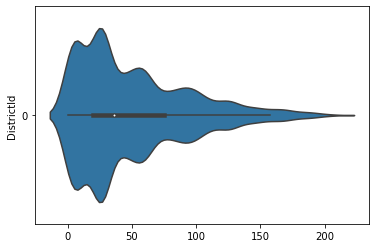

In [50]:
sns.violinplot(data=data.DistrictId, orient='h')
plt.ylabel('DistrictId')
plt.show()

Вычисляем популярные районы и присваиваем им индекс 1, непопулярным индекс 0

In [51]:
dist_ind = np.array(data.DistrictId.value_counts()[data.DistrictId.value_counts() > 75].index)
dist_ind_test = np.array(X_test.DistrictId.value_counts()[X_test.DistrictId.value_counts() > 75].index)

In [52]:
data.loc[data['DistrictId'].isin(dist_ind), 'DistrictId'] = 1
X_test.loc[X_test['DistrictId'].isin(dist_ind), 'DistrictId'] = 1
data.loc[~data['DistrictId'].isin(dist_ind), 'DistrictId'] = 0
X_test.loc[~X_test['DistrictId'].isin(dist_ind), 'DistrictId'] = 0

In [53]:
data.DistrictId.value_counts()

1    6454
0    3546
Name: DistrictId, dtype: int64

вычисляем среднюю площадь комнат и добавляем характеристику

In [54]:
data['RoomSquare'] = data.LifeSquare / data.Rooms
X_test['RoomSquare'] = X_test.LifeSquare / X_test.Rooms

создаем коллонку категорий этажей

In [55]:
data.loc[data['Floor'] <= 5, 'Floor_cat'] = 1  
data.loc[(data['Floor'] > 5) & (data['Floor'] <= 12), 'Floor_cat'] = 2
data.loc[(data['Floor'] > 12) & (data['Floor'] <= 17), 'Floor_cat'] = 3
data.loc[data['Floor'] > 17, 'Floor_cat'] = 4

X_test.loc[X_test['Floor'] <= 5, 'Floor_cat'] = 1  
X_test.loc[(X_test['Floor'] > 5) & (X_test['Floor'] <= 12), 'Floor_cat'] = 2
X_test.loc[(X_test['Floor'] > 12) & (X_test['Floor'] <= 17), 'Floor_cat'] = 3
X_test.loc[X_test['Floor'] > 17, 'Floor_cat'] = 4

добавляем коэффициент жилой площади

In [56]:
data['LifeS_cof'] = data['LifeSquare'] / data['Square']
X_test['LifeS_cof'] = X_test['LifeSquare'] / X_test['Square']

добавляем коэффициент площади кухни

In [57]:
data['KitchS_cof'] = data['KitchenSquare'] / data['Square']
X_test['KitchS_cof'] = X_test['KitchenSquare'] / X_test['Square']

добавляем характеристику оставшейся площади

In [58]:
data['Rest_of_sq'] =  (data['Square'] - data['KitchenSquare']) - data['LifeSquare']
X_test['Rest_of_sq'] = (X_test['Square'] - X_test['KitchenSquare']) - X_test['LifeSquare']

добавляем характеристику коэффициент полезной площади

In [59]:
data['Useful_sq_coef'] =  (data['LifeSquare'] - data['KitchenSquare']) / data['Square']
X_test['Useful_sq_coef'] = (X_test['LifeSquare'] - X_test['KitchenSquare']) / X_test['Square']

определяем характеристики с наибольшей коллеряцией

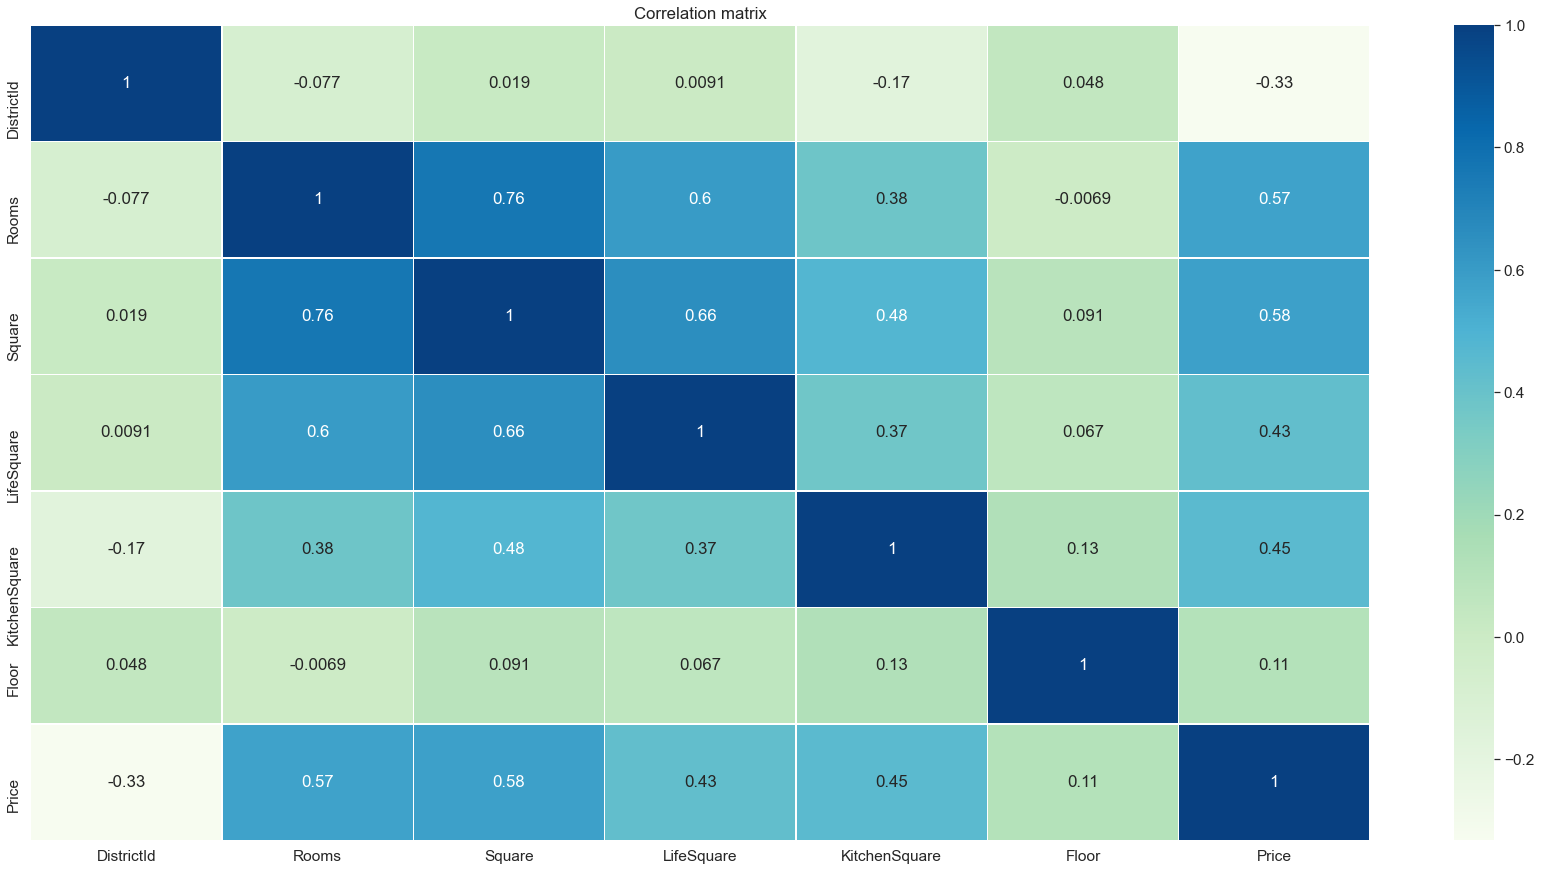

In [60]:
plt.figure(figsize = (30,15))

sns.set(font_scale=1.4)
sns.heatmap(data[['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor','Price']].corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

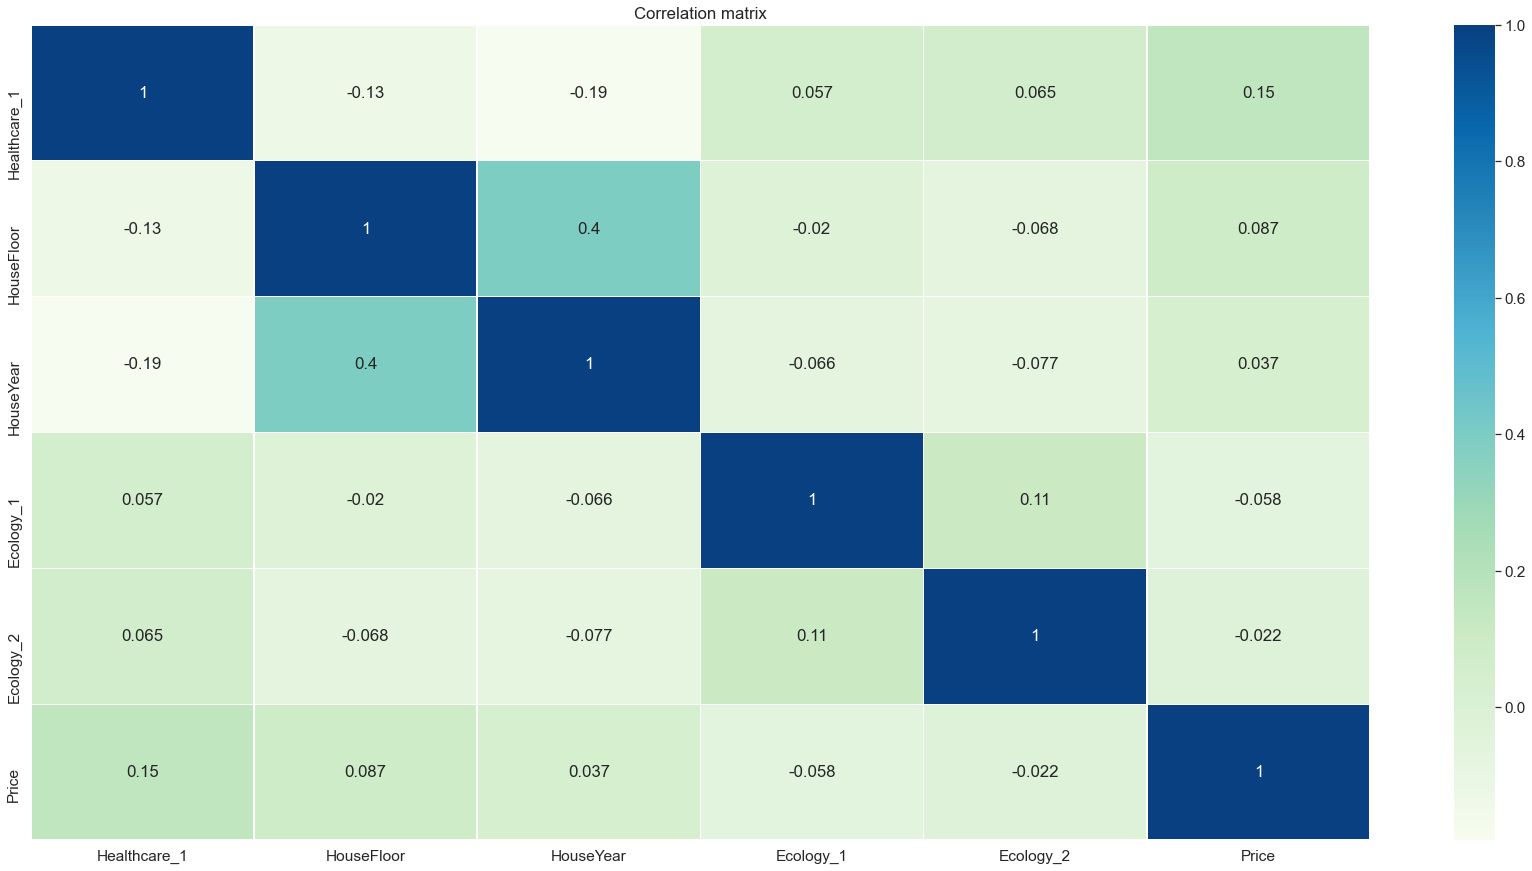

In [61]:
plt.figure(figsize = (30,15))

sns.set(font_scale=1.4)
sns.heatmap(data[['Healthcare_1', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Price']].corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

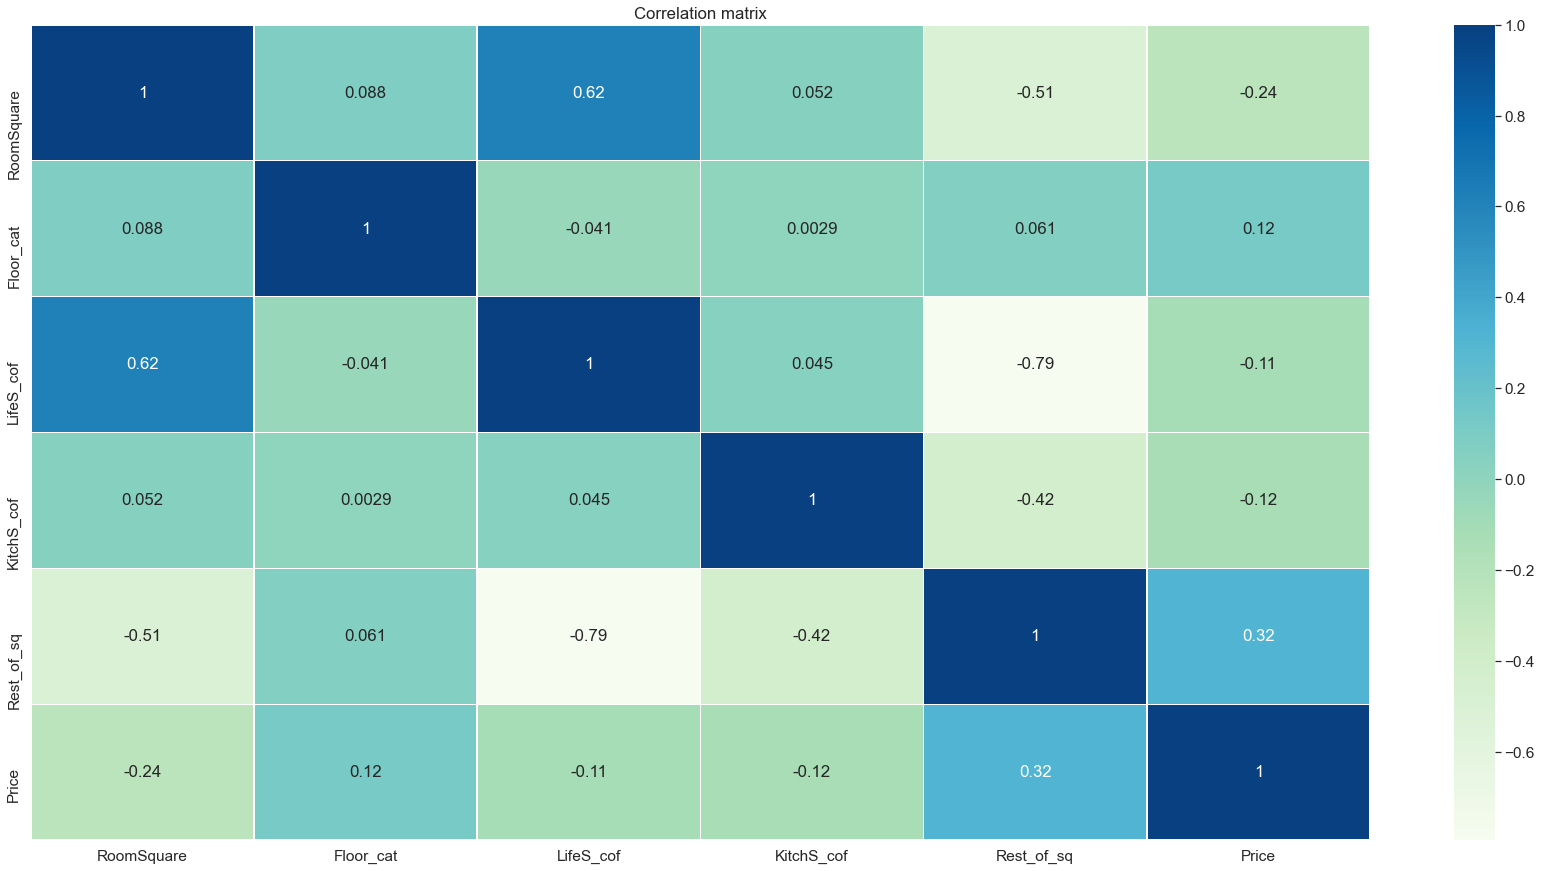

In [63]:
plt.figure(figsize = (30,15))

sns.set(font_scale=1.4)
sns.heatmap(data[['RoomSquare', 'Floor_cat', 'LifeS_cof', 'KitchS_cof', 'Rest_of_sq', 'Price']].corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [64]:
data.isna().sum()

Id                0
DistrictId        0
Rooms             0
Square            0
LifeSquare        0
KitchenSquare     0
Floor             0
HouseFloor        0
HouseYear         0
Ecology_1         0
Ecology_2         0
Ecology_3         0
Social_1          0
Social_2          0
Social_3          0
Healthcare_1      0
Helthcare_2       0
Shops_1           0
Shops_2           0
Price             0
RoomSquare        0
Floor_cat         0
LifeS_cof         0
KitchS_cof        0
Rest_of_sq        0
Useful_sq_coef    0
dtype: int64

In [65]:
target_name = ['Price']
feature_names = [
             'Id',
             'DistrictId',
             'Rooms',
             'Square',
             'LifeSquare',
             'KitchenSquare',
             'Floor',
             'HouseFloor',
             'HouseYear',
             'Ecology_1',
             'Ecology_2',
             'Ecology_3',
             'Social_1',
             'Social_2',
             'Social_3',
             'Helthcare_2',
             'Healthcare_1',
             'Shops_1',
             'RoomSquare',
             'Floor_cat',
             'LifeS_cof',
             'KitchS_cof',
             'Rest_of_sq',
             'Useful_sq_coef'
            
]

In [66]:
X = data[feature_names]
X.index = data.Id
X = X.drop('Id', axis=1)


X_final = X_test[feature_names]
X_final.index = X_test.Id
X_final = X_final.drop('Id', axis=1)

y = data[target_name]


scaler = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0))

colnames = X.columns

X = pd.DataFrame(scaler.fit_transform(X), columns=colnames)
X_test_scaled = pd.DataFrame(scaler.transform(X_final), columns=colnames)


с помощью sklearn.model_selection GridSearchCV определяем оптимальные пареметры моделей

создаем и обучаем модель

In [67]:
model1 = ensemble.GradientBoostingRegressor(n_estimators=442, max_depth=7, min_samples_split=2,
                                            learning_rate=0.1, loss='ls', random_state=42)


In [68]:
model2 = RandomForestRegressor(n_estimators=1442, max_depth=18, random_state=42, max_features=8)

In [69]:
model = VotingRegressor([('model1', model1), ('model2', model2)])

In [70]:
model.fit(X, y.Price.ravel())

VotingRegressor(estimators=[('model1',
                             GradientBoostingRegressor(max_depth=7,
                                                       n_estimators=442,
                                                       random_state=42)),
                            ('model2',
                             RandomForestRegressor(max_depth=18, max_features=8,
                                                   n_estimators=1442,
                                                   random_state=42))])

In [71]:
y_pred = model.predict(X_test_scaled)
preds = pd.DataFrame()
preds['Id'] = X_final.index
preds['Price'] = y_pred
preds.to_csv('submission.csv', index=False)